# SpaceShip Titanic

In [1263]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer

In [1264]:


train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

<AxesSubplot:>

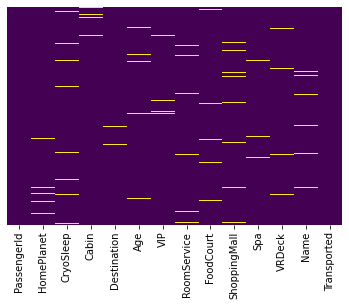

In [1265]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1266]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
    imputedHomePlanet = imputer.fit_transform([fact_col])
    imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputedHomePlanet[0]
    return df
    

In [1267]:
def impute_by_Simple_mean(df, column_name:list):
    imp = SimpleImputer( strategy='mean')
    imp.fit(df[column_name])
    transformed = imp.transform(df[column_name])
    # print(transformed)
    df = df.drop(df[column_name], axis = 1)
    df[column_name ] = transformed
    return df
    
    


In [1268]:
# to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# for i in to_impute_num:
#     train = impute_by_Simple_mean(train, [i] )

In [1269]:
# to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
# for i in to_impute_knn:
#     train = impute_by_KNN(train,i)

In [1270]:
# factHome, lable = pd.factorize(train['HomePlanet'])
# factHome

In [1271]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
# imputedHomePlanet = imputer.fit_transform([factHome])

<AxesSubplot:>

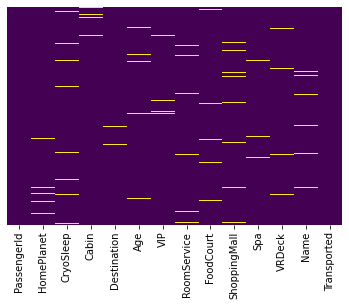

In [1272]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Preserving Distict characters for Later Purpose

In [1273]:

def remove_missing_values(df, to_impute_num, to_impute_knn):
    for i in to_impute_num:
        df = impute_by_Simple_mean(df, [i] )
    for i in to_impute_knn:
        df = impute_by_KNN(df,i)
    
    return df
    

Now the dataset Does not have any Null Values

In [1274]:
to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [1275]:
train = remove_missing_values(train, to_impute_num, to_impute_knn)
test =  remove_missing_values(test, to_impute_num, to_impute_knn)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated,

In [1276]:
Name = train['Name']
PassengerId =  train['PassengerId']
Cabin = train['Cabin']
train.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

Saving these columns for later use

In [1277]:
df = pd.DataFrame(columns=  ['Name', 'PassengerId', 'Cabin'] )
df['Name'] = Name
df['PassengerId'] = PassengerId
df['Cabin'] = Cabin
df.to_csv('preprocessed_data/train_saved_columns.csv')

In [1278]:
Name = test['Name']
PassengerId =  test['PassengerId']
Cabin = test['Cabin']
test.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [1279]:
df = pd.DataFrame(columns=  ['Name', 'PassengerId', 'Cabin'] )
df['Name'] = Name
df['PassengerId'] = PassengerId
df['Cabin'] = Cabin
df.to_csv('preprocessed_data/test_saved_columns.csv')

In [1280]:
train.to_csv(r'preprocessed_data\train_wo_missing.csv')
test.to_csv(r'preprocessed_data\test_wo_missing.csv')

<AxesSubplot:>

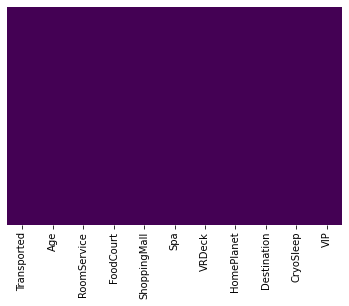

In [1281]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Getting Dummies

In [1282]:
# dummies  = pd.get_dummies(train['HomePlanet'], drop_first = True)
# dummies  = pd.get_dummies(train['HomePlanet'])

In [1283]:
to_impute_knn

['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [1284]:
def encode(df, to_impute_knn):
    for i in to_impute_knn:
        dummies  = pd.get_dummies(df[i], drop_first = True, prefix=i)
        df = pd.concat([df,dummies], axis=1)
        df= df.drop(i, axis = 1)
    return df
        
    

In [1285]:
train = encode(train, to_impute_knn)
test  = encode(test,to_impute_knn )

In [1286]:
train['Transported'], lable= pd.factorize(train['Transported'])

In [1287]:
train.to_csv(r'preprocessed_data\train_encoded.csv')
test.to_csv(r'preprocessed_data\test_encoded.csv')

In [1288]:
train

,Transported,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True
0,0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0
1,1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,1,0,0
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1,0,1
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1,0,0
4,1,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1
8689,0,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
8690,1,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,1,0,0
8691,0,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0


In [1289]:
test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True
0,27.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0,0,0,1,0,0
2,31.000000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,38.000000,0.0,6652.0,0.0,181.0,585.0,1,0,0,1,0,0
4,20.000000,10.0,0.0,635.0,0.0,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0
4273,42.000000,0.0,847.0,17.0,10.0,144.0,0,0,0,1,0,0
4274,28.658146,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,1,0,1,0,0,0


# Outlier Detection

In [1290]:
import matplotlib.pyplot as plt

In [1291]:
df = pd.read_csv(r'preprocessed_data\train_saved_columns.csv')
column = 'Age'
    # print( train[column].shape, PassengerId.shape)

df1 = pd.read_csv(r'preprocessed_data\train_saved_columns.csv')
df2 = pd.read_csv(r'preprocessed_data\train_encoded.csv')

# sns.scatterplot(x = df2['Age'], y = df1['PassengerId'])
    

In [1292]:
df2['PassengerId'] = df1['PassengerId']

{'whiskers': [<matplotlib.lines.Line2D at 0x24779207a60>,
 'caps': [<matplotlib.lines.Line2D at 0x2477b1ac040>,
 'boxes': [<matplotlib.lines.Line2D at 0x24779207790>],
 'medians': [<matplotlib.lines.Line2D at 0x2477b1ac5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2477b1ac8b0>],
 'means': []}

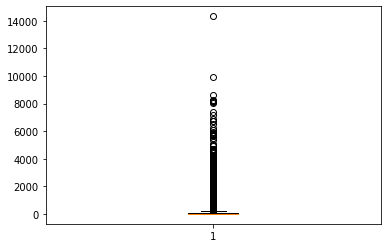

In [1293]:
plt.boxplot(data = df2, x = 'RoomService')

In [1294]:

import numpy as np
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [1295]:
outliers_z = detect_outliers(df2['Age'])
len(outliers_z)

30

In [1296]:
def outlier_detection_using_Iqr(data):
    outliers = []
    data = sorted(data)
    quantile1, quantile3= np.percentile(data,[25,75])
    iqr_value=quantile3-quantile1
    print(iqr_value)
    lower_bound_val = quantile1 -(1.5 * iqr_value) 
    upper_bound_val = quantile3 +(1.5 * iqr_value)
    for i in data :
        if i<lower_bound_val or  i> upper_bound_val:
            outliers.append(i)
    return outliers
    

In [1297]:
outliers_iqr = outlier_detection_using_Iqr(df2['Age'])

17.0


In [1298]:
train['Expense'] = train['RoomService'] + train['VRDeck'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa']
test['Expense'] = test['RoomService'] + test['VRDeck'] + test['FoodCourt'] + test['ShoppingMall'] + train['Spa']

<AxesSubplot:xlabel='Expense', ylabel='Count'>

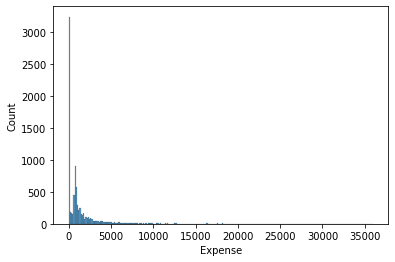

In [1299]:
sns.histplot(data = train , x = 'Expense')

In [1300]:
# train = train.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)
# test = test.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)



In [1301]:
def outlier_detection_using_Iqr_skewed(data):
        outliers = []
        data = sorted(data)
        quantile1, quantile3= np.percentile(data,[25,75])
        iqr_value=quantile3-quantile1
        lower_bound_val = quantile1 -(3 * iqr_value) 
        upper_bound_val = quantile3 +(3 * iqr_value)
        # print(lower_bound_val)
        # print(upper_bound_val)
        for i in data :
            if i<lower_bound_val or  i> upper_bound_val:
                outliers.append(i)
        return outliers

In [1302]:
outlier_skewed = outlier_detection_using_Iqr_skewed(train['Expense'])
len(outlier_skewed)

520

In [1303]:
# train.loc[train['Expense'] > 0, 'Expense'] = 1
# test.loc[test['Expense'] > 0, 'Expense'] = 1


In [1304]:
def remove_outliers(data):
    def detect_outliers(data):
        outliers=[]
        threshold=3
        mean = np.mean(data)
        std =np.std(data)
        
        
        for i in data:
            z_score= (i - mean)/std 
            if np.abs(z_score) > threshold:
                outliers.append(i)
        return outliers
    def outlier_detection_using_Iqr(data):
        outliers = []
        data = sorted(data)
        quantile1, quantile3= np.percentile(data,[25,75])
        iqr_value=quantile3-quantile1
        lower_bound_val = quantile1 -(1.5 * iqr_value) 
        upper_bound_val = quantile3 +(1.5 * iqr_value)
        for i in data :
            if i<lower_bound_val or  i> upper_bound_val:
                outliers.append(i)
        return outliers
    def outlier_detection_using_Iqr_skewed(data):
        outliers = []
        data = sorted(data)
        quantile1, quantile3= np.percentile(data,[25,75])
        iqr_value=quantile3-quantile1
        lower_bound_val = quantile1 -(3 * iqr_value) 
        upper_bound_val = quantile3 +(3 * iqr_value)
        for i in data :
            if i<lower_bound_val or  i> upper_bound_val:
                outliers.append(i)
        return outliers
    
    
    outliers_z = detect_outliers(data['Age'])
    outliers_iqr = outlier_detection_using_Iqr(data['Age'])
    outliers_iqr_skewed = outlier_detection_using_Iqr_skewed(data['Expense'])
    data['Expense'] = data['RoomService'] + data['VRDeck'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa']
    
    data.loc[data['Age']>=min( outliers_z ), 'Age'] = min( outliers_z )
    data.loc[data['Expense']>=min(outliers_iqr_skewed), 'Expense'] = min( outliers_iqr_skewed )
    
   
    
    data = data.drop(['RoomService', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'Spa'], axis = 1)
    # data.loc[data['Expense'] > 0, 'Expense'] = 1
    return data

In [1305]:
train = remove_outliers(train)
test = remove_outliers(test)

In [1306]:
train.to_csv(r'preprocessed_data/train_wo_outliers_all_expense_01.csv')
test.to_csv(r'preprocessed_data/test_wo_outliers_all_expense_01.csv')

In [1307]:
# train.to_csv(r'preprocessed_data/train_wo_outliers_all.csv')
# test.to_csv(r'preprocessed_data/test_wo_outliers_all.csv')

In [1308]:
# train.to_csv(r'preprocessed_data/train_wo_outliers.csv')
# test.to_csv(r'preprocessed_data/test_wo_outliers.csv')

<AxesSubplot:xlabel='Expense', ylabel='Count'>

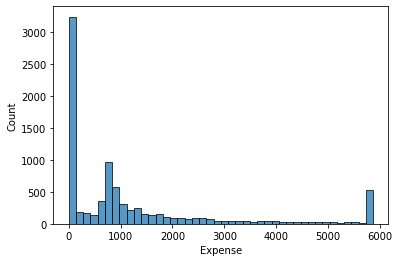

In [1309]:
sns.histplot(data = train, x = 'Expense')

In [1310]:
train

,Transported,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense
0,0,39.0,1,0,0,1,0,0,0.0
1,1,24.0,0,0,0,1,0,0,736.0
2,0,58.0,1,0,0,1,0,1,5863.0
3,0,33.0,1,0,0,1,0,0,5176.0
4,1,16.0,0,0,0,1,0,0,1091.0
...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0,0,0,0,1,5863.0
8689,0,18.0,0,0,1,0,1,0,0.0
8690,1,26.0,0,0,0,1,0,0,1873.0
8691,0,32.0,1,0,0,0,0,0,4637.0


<AxesSubplot:xlabel='Expense', ylabel='Count'>

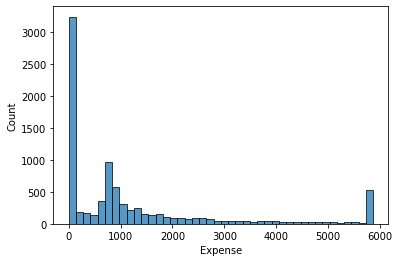

In [1311]:
# sns.histplot(data = train, x = 'Age')
sns.histplot(data = train, x = 'Expense')


# Feature  Transformation

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


Here we can not do log and reciprocal and also BOXCOX since we have a lot of 0 values

In [1312]:
import scipy.stats as stat
import pylab 

In [1313]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

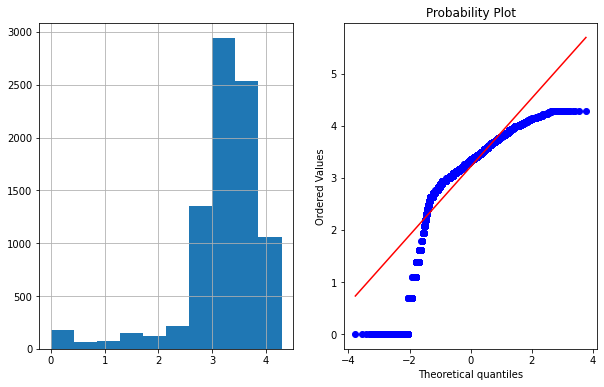

In [1314]:
train['Age_log'] = np.log1p(train['Age'])
plot_data(train,'Age_log')

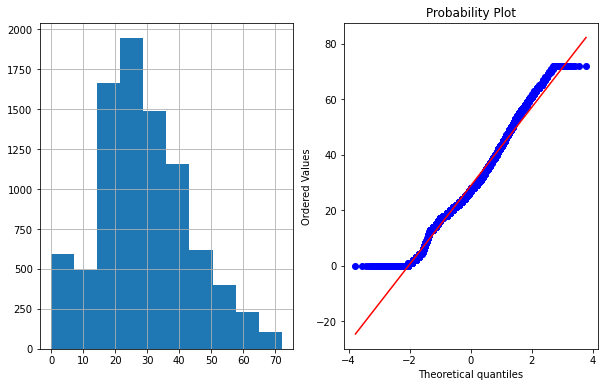

In [1315]:
plot_data(train,'Age')

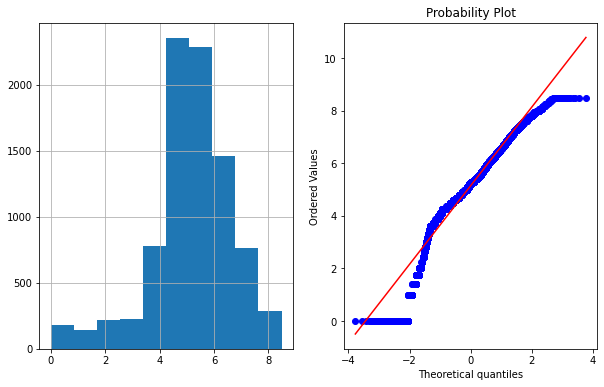

In [1316]:
train['Age_square_root'] = (train['Age'])**(1/2)
plot_data(train,'Age_square_root')

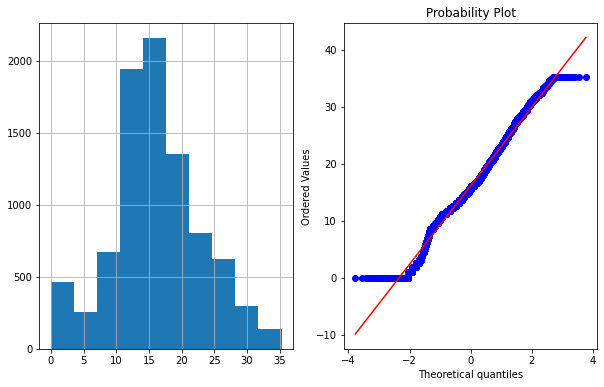

In [1317]:
train['Age_exponential']=train.Age**(1/1.2)
plot_data(train,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

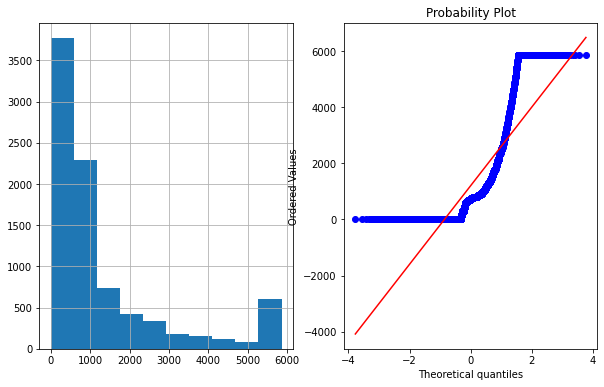

In [1318]:
plot_data(train,'Expense')

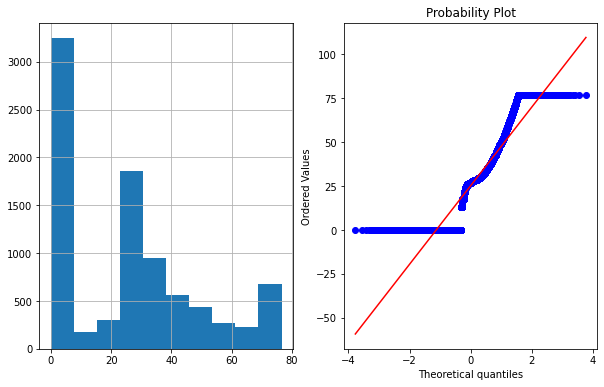

In [1319]:
train['Expense_square_root'] = (train['Expense'])**(1/2)
plot_data(train,'Expense_square_root')

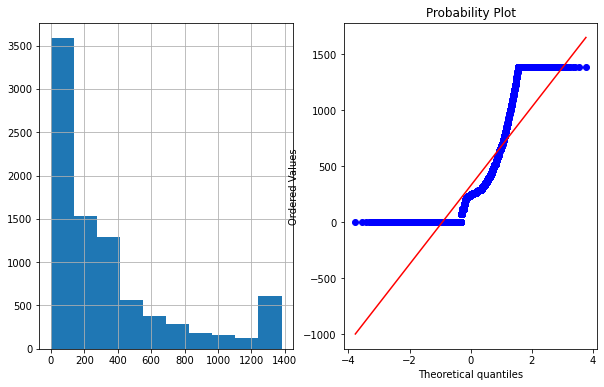

In [1320]:
train['Expense_exponential']=train.Expense**(1/1.2)
plot_data(train,'Expense_exponential')

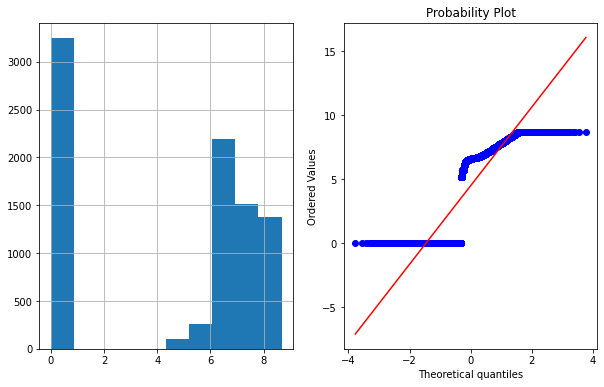

In [1321]:
train['Expense_log']=np.log1p(train.Expense)
plot_data(train,'Expense_log')

In [1322]:
train = train.iloc[:, :9]
train

,Transported,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense
0,0,39.0,1,0,0,1,0,0,0.0
1,1,24.0,0,0,0,1,0,0,736.0
2,0,58.0,1,0,0,1,0,1,5863.0
3,0,33.0,1,0,0,1,0,0,5176.0
4,1,16.0,0,0,0,1,0,0,1091.0
...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0,0,0,0,1,5863.0
8689,0,18.0,0,0,1,0,1,0,0.0
8690,1,26.0,0,0,0,1,0,0,1873.0
8691,0,32.0,1,0,0,0,0,0,4637.0


### The decision Made
1. Use Standard Scalar on Age 
2. Use RobustScalar on Expense

In [1323]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [1324]:
train

,Transported,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense
0,0,39.0,1,0,0,1,0,0,0.0
1,1,24.0,0,0,0,1,0,0,736.0
2,0,58.0,1,0,0,1,0,1,5863.0
3,0,33.0,1,0,0,1,0,0,5176.0
4,1,16.0,0,0,0,1,0,0,1091.0
...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0,0,0,0,1,5863.0
8689,0,18.0,0,0,1,0,1,0,0.0
8690,1,26.0,0,0,0,1,0,0,1873.0
8691,0,32.0,1,0,0,0,0,0,4637.0


In [1325]:
train.loc[train['Expense'] > 0, 'Expense_encoded'] = 1
train.loc[train['Expense'] == 0, 'Expense_encoded'] = 0

test.loc[test['Expense'] > 0, 'Expense_encoded'] = 1
test.loc[test['Expense'] == 0, 'Expense_encoded'] = 0


In [1326]:
std_scaler = StandardScaler()
train['Age_scaled'] = pd.DataFrame(std_scaler.fit_transform(train[['Age']]), columns = ['Age_sclaed'])
train['Expense_scaled'] = pd.DataFrame(std_scaler.fit_transform(train[['Expense']]), columns = ['Expense_scaled'])

test['Age_scaled'] = pd.DataFrame(std_scaler.fit_transform(test[['Age']]), columns = ['Age_sclaed'])
test['Expense_scaled'] = pd.DataFrame(std_scaler.fit_transform(test[['Expense']]), columns = ['Expense_scaled'])




In [1327]:
train


,Transported,Age,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,Expense,Expense_encoded,Age_scaled,Expense_scaled
0,0,39.0,1,0,0,1,0,0,0.0,0.0,0.711687,-0.732460
1,1,24.0,0,0,0,1,0,0,736.0,1.0,-0.336766,-0.285081
2,0,58.0,1,0,0,1,0,1,5863.0,1.0,2.039727,2.831376
3,0,33.0,1,0,0,1,0,0,5176.0,1.0,0.292306,2.413781
4,1,16.0,0,0,0,1,0,0,1091.0,1.0,-0.895940,-0.069294
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0,0,0,0,1,5863.0,1.0,0.851481,2.831376
8689,0,18.0,0,0,1,0,1,0,0.0,0.0,-0.756147,-0.732460
8690,1,26.0,0,0,0,1,0,0,1873.0,1.0,-0.196972,0.406046
8691,0,32.0,1,0,0,0,0,0,4637.0,1.0,0.222409,2.086149


<AxesSubplot:>

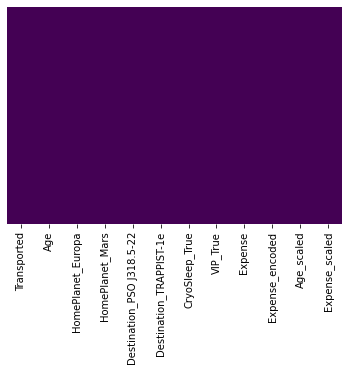

In [1328]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Generating New Logical Columns

In [1329]:
train_saved =pd.read_csv(r'preprocessed_data\train_saved_columns.csv')
test_saved = pd.read_csv(r'preprocessed_data\test_saved_columns.csv')

In [1330]:
train_saved = train_saved.iloc[:,1:]
test_saved = test_saved.iloc[:,1:]

<AxesSubplot:>

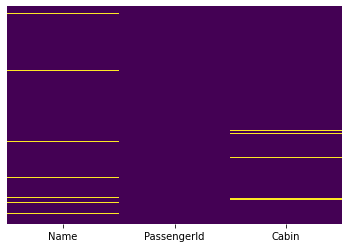

In [1331]:

sns.heatmap(train_saved.isnull(), yticklabels=False, cbar=False, cmap='viridis')

sns.heatmap(test_saved.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Handling missing Values

In [1332]:
train_saved = impute_by_KNN(train_saved,'Cabin')
test_saved = impute_by_KNN(test_saved,'Cabin')

train_saved = impute_by_KNN(train_saved,'Name')
test_saved = impute_by_KNN(test_saved,'Name')



C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_30704/2146097444.py:5: FutureWarning: Indexing with a float is deprecated,

<AxesSubplot:>

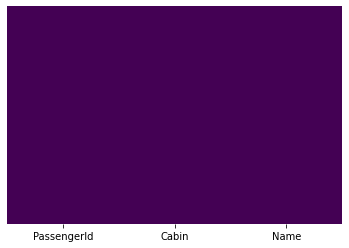

In [1333]:

sns.heatmap(train_saved.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# sns.heatmap(test_saved.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [1334]:
train_saved['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

### Generating New columns by splitting

In [1335]:
train_saved['Group_id'] = [int((i.split('_'))[0]) for i in  train_saved['PassengerId'] ]
test_saved['Group_id'] = [int((i.split('_'))[0]) for i in  test_saved['PassengerId'] ]

train_saved['Member_id'] = [int((i.split('_'))[1]) for i in  train_saved['PassengerId'] ]
test_saved['Member_id'] = [int((i.split('_'))[1]) for i in  test_saved['PassengerId'] ]

In [1336]:
train_saved['Deck'] = [(i.split('/'))[0] for i in  train_saved['Cabin']]
test_saved['Deck'] = [(i.split('/'))[0] for i  in  test_saved['Cabin']]

train_saved['Cabin_Num'] = [int((i.split('/'))[1]) for i in  train_saved['Cabin']]
test_saved['Cabin_Num'] = [int((i.split('/'))[1]) for i  in  test_saved['Cabin']]

train_saved['Cabin_side'] = [(i.split('/'))[2] for i in  train_saved['Cabin']]
test_saved['Cabin_side'] = [(i.split('/'))[2] for i  in  test_saved['Cabin']]


                               
                            
                              


#### Length Of Name

In [1337]:
train_saved['Name_Length'] = [len(i) for i  in  train_saved['Name']]
test_saved['Name_Length'] = [len(i) for i  in  test_saved['Name']]

#### Number of Group Members

In [1338]:
Group_id_counts = dict(train_saved['Group_id'].value_counts())
Group_id_counts2 = dict(test_saved['Group_id'].value_counts())


train_saved['Group_members'] = [Group_id_counts[i] for i in train_saved['Group_id']]

test_saved['Group_members'] = [Group_id_counts2[i] for i in test_saved['Group_id']]



In [1339]:
test_saved

,PassengerId,Cabin,Name,Group_id,Member_id,Deck,Cabin_Num,Cabin_side,Name_Length,Group_members
0,0013_01,G/3/S,Nelly Carsoning,13,1,G,3,S,15,1
1,0018_01,F/4/S,Lerome Peckers,18,1,F,4,S,14,1
2,0019_01,C/0/S,Sabih Unhearfus,19,1,C,0,S,15,1
3,0021_01,C/1/S,Meratz Caltilter,21,1,C,1,S,16,1
4,0023_01,F/5/S,Brence Harperez,23,1,F,5,S,15,1
...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,G/1496/S,Jeron Peter,9266,2,G,1496,S,11,2
4273,9269_01,G/1498/S,Matty Scheron,9269,1,G,1498,S,13,1
4274,9271_01,D/296/P,Jayrin Pore,9271,1,D,296,P,11,1
4275,9273_01,D/297/P,Kitakan Conale,9273,1,D,297,P,14,1


In [1340]:
train_saved

,PassengerId,Cabin,Name,Group_id,Member_id,Deck,Cabin_Num,Cabin_side,Name_Length,Group_members
0,0001_01,B/0/P,Maham Ofracculy,1,1,B,0,P,15,1
1,0002_01,F/0/S,Juanna Vines,2,1,F,0,S,12,1
2,0003_01,A/0/S,Altark Susent,3,1,A,0,S,13,2
3,0003_02,A/0/S,Solam Susent,3,2,A,0,S,12,2
4,0004_01,F/1/S,Willy Santantines,4,1,F,1,S,17,1
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,Gravior Noxnuther,9276,1,A,98,P,17,1
8689,9278_01,G/1499/S,Kurta Mondalley,9278,1,G,1499,S,15,1
8690,9279_01,G/1500/S,Fayey Connon,9279,1,G,1500,S,12,1
8691,9280_01,E/608/S,Celeon Hontichre,9280,1,E,608,S,16,2


In [1341]:
import pandas as pd
from pandas_profiling import profile_report

#Loading the dataset
#Generate a report
profile = profile_report.ProfileReport(train_saved) #minimal == true can be used to reduce the output data stream
profile.to_file(output_file = "Reports/train_saved_cols.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Encoding Generated Columns

In [1342]:
train_saved['Deck_fact'], lables = pd.factorize(train_saved['Deck'], sort = True)
test_saved['Deck_fact'], lables = pd.factorize(test_saved['Deck'], sort = True)
# train_saved['Deck','Deck_fact']

train_saved['Cabin_side_fact'], lables = pd.factorize(train_saved['Cabin_side'], sort = True)
test_saved['Cabin_side_fact'], lables = pd.factorize(test_saved['Cabin_side'], sort = True)



In [1343]:
test_saved

,PassengerId,Cabin,Name,Group_id,Member_id,Deck,Cabin_Num,Cabin_side,Name_Length,Group_members,Deck_fact,Cabin_side_fact
0,0013_01,G/3/S,Nelly Carsoning,13,1,G,3,S,15,1,6,1
1,0018_01,F/4/S,Lerome Peckers,18,1,F,4,S,14,1,5,1
2,0019_01,C/0/S,Sabih Unhearfus,19,1,C,0,S,15,1,2,1
3,0021_01,C/1/S,Meratz Caltilter,21,1,C,1,S,16,1,2,1
4,0023_01,F/5/S,Brence Harperez,23,1,F,5,S,15,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,G/1496/S,Jeron Peter,9266,2,G,1496,S,11,2,6,1
4273,9269_01,G/1498/S,Matty Scheron,9269,1,G,1498,S,13,1,6,1
4274,9271_01,D/296/P,Jayrin Pore,9271,1,D,296,P,11,1,3,0
4275,9273_01,D/297/P,Kitakan Conale,9273,1,D,297,P,14,1,3,0


In [1344]:
train_saved

,PassengerId,Cabin,Name,Group_id,Member_id,Deck,Cabin_Num,Cabin_side,Name_Length,Group_members,Deck_fact,Cabin_side_fact
0,0001_01,B/0/P,Maham Ofracculy,1,1,B,0,P,15,1,1,0
1,0002_01,F/0/S,Juanna Vines,2,1,F,0,S,12,1,5,1
2,0003_01,A/0/S,Altark Susent,3,1,A,0,S,13,2,0,1
3,0003_02,A/0/S,Solam Susent,3,2,A,0,S,12,2,0,1
4,0004_01,F/1/S,Willy Santantines,4,1,F,1,S,17,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,Gravior Noxnuther,9276,1,A,98,P,17,1,0,0
8689,9278_01,G/1499/S,Kurta Mondalley,9278,1,G,1499,S,15,1,6,1
8690,9279_01,G/1500/S,Fayey Connon,9279,1,G,1500,S,12,1,6,1
8691,9280_01,E/608/S,Celeon Hontichre,9280,1,E,608,S,16,2,4,1


### Feature Transformations